# computing vs machine learning

I realised that the previous direction was too large a model for me to complete in a short time, so I decided to make some exploratory attempts based on my artificial database.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
import tensorflow as tf

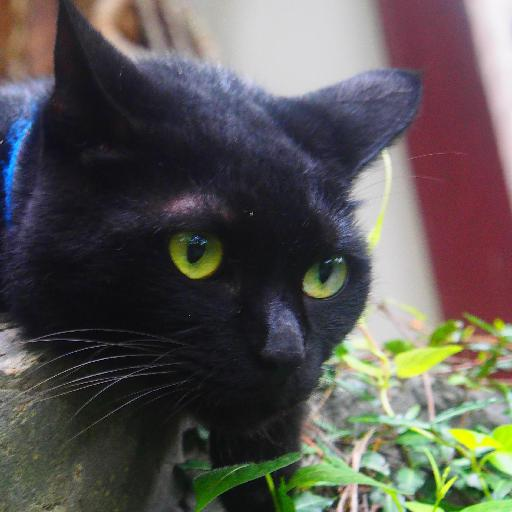

In [4]:
tf.keras.preprocessing.image.load_img('dataset-cat eye :close/flickr_cat_000392.jpg')

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('dataset-cat eye :close/Annotations-export.csv', encoding='latin-1')

In [18]:
print(df.shape)
number=df.shape

(679, 6)


In [8]:
df.head()

,image,xmin,ymin,xmax,ymax,label
0,flickr_cat_000003.jpg,285.046832,236.630854,359.449036,292.121212,cat_eye_right
1,flickr_cat_000003.jpg,147.669421,231.253444,209.101928,294.380165,cat_eye_left
2,flickr_cat_000005.jpg,298.920110,249.760331,368.201102,301.333333,cat_eye_right
3,flickr_cat_000005.jpg,150.534435,247.608815,228.148760,309.900826,cat_eye_left
4,flickr_cat_000002.jpg,282.300275,229.033058,346.369146,282.482094,cat_eye_right


In [14]:
row = df.loc[3]
print(row)

image    flickr_cat_000005.jpg
xmin                150.534435
ymin                247.608815
xmax                 228.14876
ymax                309.900826
label             cat_eye_left
Name: 3, dtype: object


In [17]:
eyex= df.at[3, 'xmax']-df.at[3, 'xmin']
eyey= df.at[3, 'ymax']-df.at[3, 'ymin']
eyerate=eyex/eyey
print(eyerate)

1.245975588183266


In [28]:
ex = []
ey = []
er = []#eyerate
for i in range(1, len(df)):
    ex[i] = df.at[i, 'xmax']-df.at[i, 'xmin']
    ey[i] = df.at[i, 'ymax']-df.at[i, 'ymin']
    er[i] = ex/ey
    print(er[i])

IndexError: list assignment index out of range

In [29]:
for i in range(1, len(df)):
    diff_x = df.at[i, 'xmax'] - df.at[i, 'xmin']
    diff_y = df.at[i, 'ymax'] - df.at[i, 'ymin']
    ex.append(diff_x)
    ey.append(diff_y)
    er.append(diff_x / diff_y)
    print(er[i-1])  # 打印 er 的前一个元素

0.9731616844861447
1.3433577266171677
1.245975588183266
1.1986908566127195
0.9693259277960109
1.3440583881578965
1.153960090516355
1.230011226144443
1.2359907436816548
0.9539076415135332
0.7938068061720565
1.2661755124542666
1.046799303889751
1.2098159509202464
1.2818480353300885
1.0209966827503014
0.9858455193100857
1.2298839020957935
1.2954052098408109
1.1717676452217363
1.0846619897959189
1.115672894059738
1.0254864445326883
1.1555231801862733
1.1517318628295705
1.0491631342044312
1.1060097498601458
1.0732164424638708
1.1334522950757435
1.123126383032023
1.1893336597706774
1.1184977629140864
1.1339122689824097
1.1081415586927097
0.9761072458849482
1.1497070039996276
1.2278087339639758
1.0129701123498023
1.094503041034722
1.2063871888086148
1.0887940132399505
1.2283953786906283
1.3584109589041105
1.2621826940893088
1.255699414200963
1.5858282208588952
1.5858282208588952
1.7135039824892064
1.7135039824892064
1.3115801533444968
1.0848725259286807
1.2737669404000196
1.0042578621050273
1

In [11]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

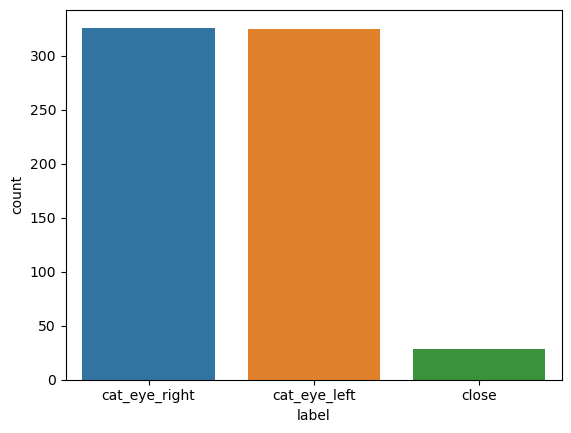

In [12]:
sns.countplot(x = df["label"], data = df)

In [15]:
close = df[df['label'] == 'close'] 

In [16]:
print(close)

                     image        xmin        ymin        xmax        ymax   
47   flickr_cat_000029.jpg  324.531680  256.515152  395.741047  301.418733  \
49   flickr_cat_000029.jpg  181.319559  255.451791  258.955923  300.760331   
81   flickr_cat_000040.jpg  317.358127  241.068871  382.595041  294.104683   
126  flickr_cat_000068.jpg  147.735537  236.002755  210.931129  289.980716   
128  flickr_cat_000068.jpg  291.611570  229.115702  359.506887  273.016529   
132  flickr_cat_000067.jpg  168.024793  243.757576  225.829201  290.137741   
134  flickr_cat_000067.jpg  282.997245  237.663912  364.986226  284.280992   
212  flickr_cat_000110.jpg  154.371901  228.327824  229.435262  275.170799   
214  flickr_cat_000110.jpg  302.988981  229.030303  369.553719  272.633609   
218  flickr_cat_000111.jpg  140.787879  227.465565  216.614325  285.887052   
220  flickr_cat_000111.jpg  281.757576  248.154270  362.906336  293.776860   
278  flickr_cat_000145.jpg  165.779614  234.851240  224.741047  

In [31]:
print(er[0])

0.9731616844861447


In [32]:
print(er[81])
print(er[420])

1.0452004333694471
1.9861120520289948


In [40]:
condition = df['label'] == 'close'  # 定义条件，替换 'column_name' 和 'some_value' 为实际的列名和值
filtered_row = df[condition]  # 根据条件过滤行

value = filtered_row['image']
print(value)

47     flickr_cat_000029.jpg
49     flickr_cat_000029.jpg
81     flickr_cat_000040.jpg
126    flickr_cat_000068.jpg
128    flickr_cat_000068.jpg
132    flickr_cat_000067.jpg
134    flickr_cat_000067.jpg
212    flickr_cat_000110.jpg
214    flickr_cat_000110.jpg
218    flickr_cat_000111.jpg
220    flickr_cat_000111.jpg
278    flickr_cat_000145.jpg
280    flickr_cat_000145.jpg
386    flickr_cat_000213.jpg
388    flickr_cat_000213.jpg
394    flickr_cat_000214.jpg
396    flickr_cat_000214.jpg
420    flickr_cat_000229.jpg
422    flickr_cat_000229.jpg
435    flickr_cat_000235.jpg
437    flickr_cat_000235.jpg
457    flickr_cat_000247.jpg
459    flickr_cat_000247.jpg
476    flickr_cat_000259.jpg
529    flickr_cat_000289.jpg
545    flickr_cat_000294.jpg
634    flickr_cat_000343.jpg
636    flickr_cat_000343.jpg
Name: image, dtype: object


In [53]:
import pandas as pd

# Assuming you have a DataFrame named `df` that contains the image information

# Create a new column for the class label
df['class'] = ''

# Assign the class labels based on the image list
close_images = ['flickr_cat_000029.jpg', 'flickr_cat_000040.jpg', 'flickr_cat_000068.jpg', 'flickr_cat_000067.jpg', 'flickr_cat_000110.jpg', 'flickr_cat_000111.jpg', 'flickr_cat_000145.jpg', 'flickr_cat_000213.jpg', 'flickr_cat_000214.jpg', 'flickr_cat_000229.jpg', 'flickr_cat_000235.jpg', 'flickr_cat_000247.jpg', 'flickr_cat_000259.jpg', 'flickr_cat_000289.jpg', 'flickr_cat_000294.jpg', 'flickr_cat_000343.jpg']
df.loc[df['image'].isin(close_images), 'class'] = 'close'
df.loc[~df['image'].isin(close_images), 'class'] = 'opened'

# Print the updated DataFrame
print(df[['image', 'class']])


                     image   class
0    flickr_cat_000003.jpg  opened
1    flickr_cat_000003.jpg  opened
2    flickr_cat_000005.jpg  opened
3    flickr_cat_000005.jpg  opened
4    flickr_cat_000002.jpg  opened
..                     ...     ...
674  flickr_cat_000365.jpg  opened
675  flickr_cat_000367.jpg  opened
676  flickr_cat_000367.jpg  opened
677  flickr_cat_000364.jpg  opened
678  flickr_cat_000364.jpg  opened

[679 rows x 2 columns]


In [54]:
print(df.columns)

Index(['image', 'xmin', 'ymin', 'xmax', 'ymax', 'label', 'class'], dtype='object')


In [56]:

# Merge rows of identical images and adjust categories
df_merged = df.groupby('image')['class'].apply(lambda x: 'halfclose' if set(['close', 'opened']).issubset(x) else x.iloc[0]).reset_index()

# output new CSV document
df_merged.to_csv('merged.csv', index=False, columns=['image', 'class'])


In [66]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam

In [67]:
import glob
from PIL import Image

image_paths = glob.glob('dataset-cat eye :close/*.jpg')  # 获取目录中所有 JPG 文件的路径

for image_path in image_paths:
    image = Image.open(image_path)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [69]:
# 创建CNN模型
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 假设有3个类别，调整为实际类别数目

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 读取包含图像和类别信息的CSV文件
df = pd.read_csv('merged.csv')

# 创建ImageDataGenerator对象并进行数据增强和预处理
datagen = ImageDataGenerator(rescale=1./255,  # 将像素值缩放到 [0, 1] 范围
                             rotation_range=20,  # 随机旋转图像范围
                             width_shift_range=0.2,  # 水平方向上随机平移图像范围
                             height_shift_range=0.2,  # 垂直方向上随机平移图像范围
                             shear_range=0.2,  # 随机错切变换范围
                             zoom_range=0.2,  # 随机缩放图像范围
                             horizontal_flip=True)  # 水平翻转图像

# 使用flow_from_dataframe函数生成训练数据集
train_generator = datagen.flow_from_dataframe(dataframe=df,
                                              directory='dataset-cat eye :close',  # 图像文件夹的路径
                                              x_col='image',  # 图像文件名所在的列
                                              y_col='class',  # 类别标签所在的列
                                              target_size=(224, 224),  # 调整图像大小
                                              batch_size=32,
                                              class_mode='categorical')  # 类别模式设置为分类

# 使用train_generator进行模型训练
history = model.fit(train_generator, epochs=10)


Found 325 validated image filenames belonging to 2 classes.
Epoch 1/10
11/11 [==============================] - 5s 442ms/step - loss: 15.2110 - accuracy: 0.9385
Epoch 2/10
11/11 [==============================] - 5s 432ms/step - loss: 0.9017 - accuracy: 0.9354
Epoch 3/10
11/11 [==============================] - 5s 422ms/step - loss: 0.3878 - accuracy: 0.9508
Epoch 4/10
11/11 [==============================] - 5s 424ms/step - loss: 0.2760 - accuracy: 0.9508
Epoch 5/10
11/11 [==============================] - 5s 432ms/step - loss: 0.3156 - accuracy: 0.9262
Epoch 6/10
11/11 [==============================] - 5s 425ms/step - loss: 0.4392 - accuracy: 0.9508
Epoch 7/10
11/11 [==============================] - 5s 416ms/step - loss: 0.2257 - accuracy: 0.9477
Epoch 8/10
11/11 [==============================] - 5s 427ms/step - loss: 0.2581 - accuracy: 0.9508
Epoch 9/10
11/11 [==============================] - 5s 419ms/step - loss: 0.2080 - accuracy: 0.9508
Epoch 10/10
11/11 [====================

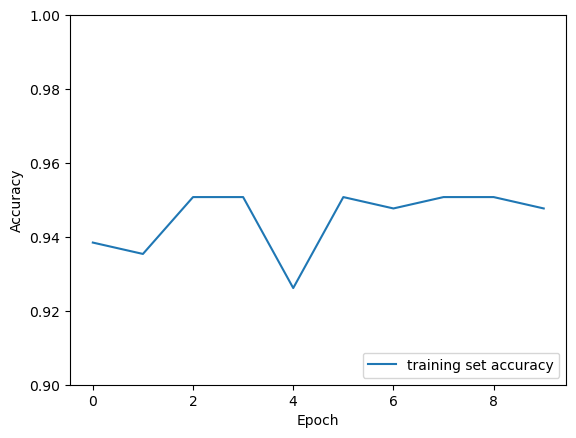

In [72]:
plt.plot(history.history['accuracy'], label='training set accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

In [73]:
# 创建CNN模型
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 假设有3个类别，调整为实际类别数目

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
from sklearn.model_selection import train_test_split

# 将数据集分割为训练集和测试集，test_size表示测试集所占比例（例如0.2表示20%的数据用于测试）
# random_state是用于随机抽样的种子值，确保每次运行得到相同的分割结果
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 创建训练集和测试集的ImageDataGenerator对象
train_datagen = ImageDataGenerator(rescale=1./255,  # 将像素值缩放到 [0, 1] 范围
                                   rotation_range=20,  # 随机旋转图像范围
                                   width_shift_range=0.2,  # 水平方向上随机平移图像范围
                                   height_shift_range=0.2,  # 垂直方向上随机平移图像范围
                                   shear_range=0.2,  # 随机错切变换范围
                                   zoom_range=0.2,  # 随机缩放图像范围
                                   horizontal_flip=True)  # 水平翻转图像

test_datagen = ImageDataGenerator(rescale=1./255)  # 只进行像素值缩放到 [0, 1] 的预处理

# 使用flow_from_dataframe函数生成训练集和测试集的数据集
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    directory='dataset-cat eye :close',  # 图像文件夹的路径
                                                    x_col='image',  # 图像文件名所在的列
                                                    y_col='class',  # 类别标签所在的列
                                                    target_size=(224, 224),  # 调整图像大小
                                                    batch_size=32,
                                                    class_mode='categorical')  # 类别模式设置为分类

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  directory='dataset-cat eye :close',  # 图像文件夹的路径
                                                  x_col='image',  # 图像文件名所在的列
                                                  y_col='class',  # 类别标签所在的列
                                                  target_size=(224, 224),  # 调整图像大小
                                                  batch_size=32,
                                                  class_mode='categorical')  # 类别模式设置为分类

# 使用train_generator进行模型训练，使用test_generator进行模型评估
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Found 260 validated image filenames belonging to 2 classes.
Found 65 validated image filenames belonging to 2 classes.
Epoch 1/10
9/9 [==============================] - 4s 377ms/step - loss: 10.5579 - accuracy: 0.9423 - val_loss: 1.6742 - val_accuracy: 0.9846
Epoch 2/10
9/9 [==============================] - 4s 436ms/step - loss: 1.8803 - accuracy: 0.8846 - val_loss: 0.1456 - val_accuracy: 0.9846
Epoch 3/10
9/9 [==============================] - 5s 501ms/step - loss: 0.4089 - accuracy: 0.9423 - val_loss: 0.1473 - val_accuracy: 0.9846
Epoch 4/10
9/9 [==============================] - 4s 498ms/step - loss: 0.3434 - accuracy: 0.9423 - val_loss: 0.1068 - val_accuracy: 0.9846
Epoch 5/10
9/9 [==============================] - 4s 432ms/step - loss: 0.2731 - accuracy: 0.9423 - val_loss: 0.1433 - val_accuracy: 0.9846
Epoch 6/10
9/9 [==============================] - 4s 420ms/step - loss: 0.2327 - accuracy: 0.9423 - val_loss: 0.1033 - val_accuracy: 0.9846
Epoch 7/10
9/9 [========================

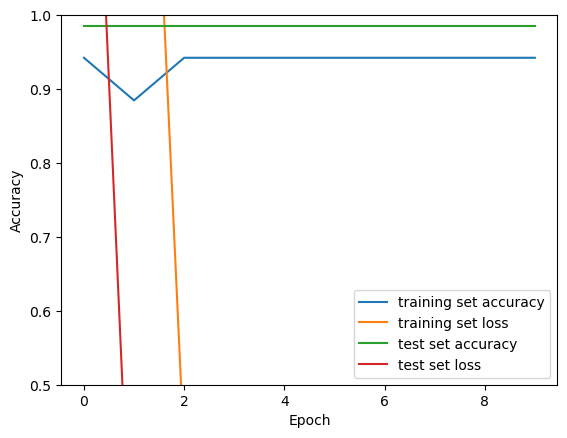

In [75]:
plt.plot(history.history['accuracy'], label='training set accuracy')
plt.plot(history.history['loss'], label='training set loss')
plt.plot(history.history['val_accuracy'], label = 'test set accuracy')
plt.plot(history.history['val_loss'], label = 'test set loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')